In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/seoul-bike-sharing-demand-prediction/SeoulBikeData.csv


In [33]:
df = pd.read_csv('/kaggle/input/seoul-bike-sharing-demand-prediction/SeoulBikeData.csv',encoding= 'unicode_escape')
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [34]:
# Display basic information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [35]:
# Summary statistics for numerical columns
print(df.describe())

       Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   


In [36]:
# Check for missing values
print(df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


In [37]:
print(df.columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


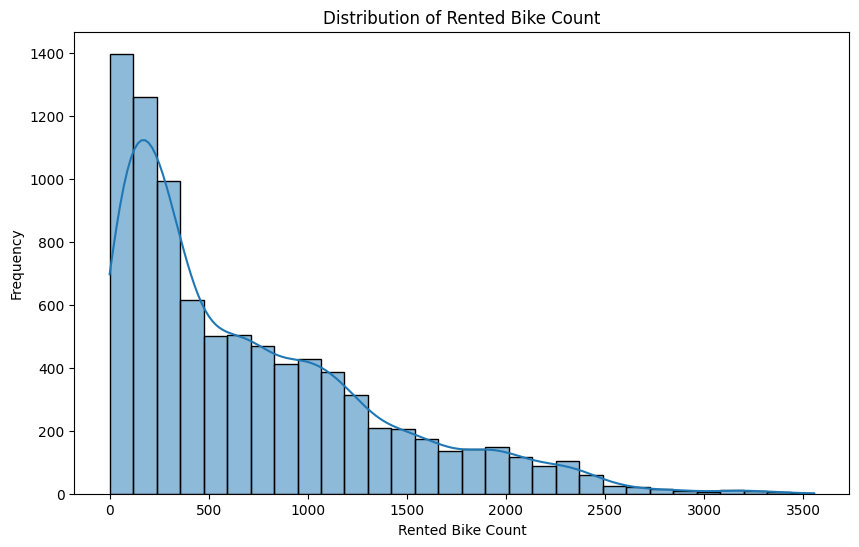

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the 'Rented Bike Count' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Rented Bike Count'], bins=30, kde=True)
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

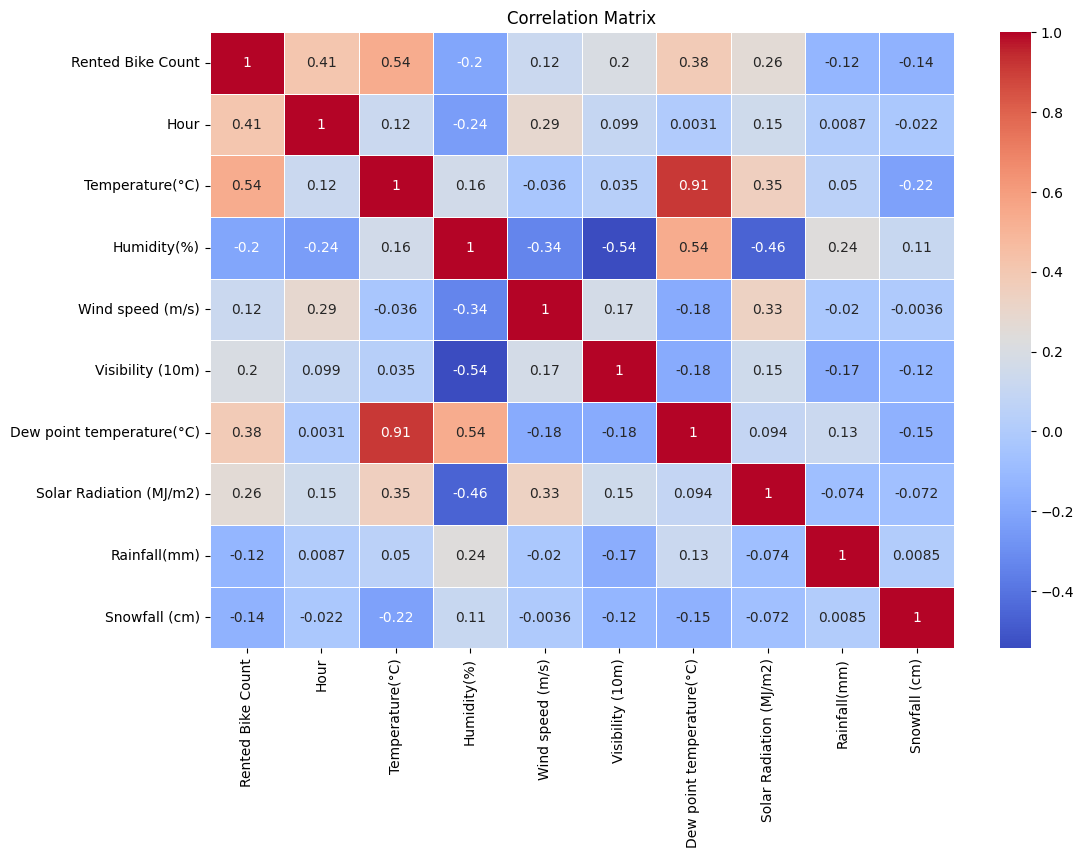

In [39]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']].corr(), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Temperature and Dew point temperature have very high correlation of 0.91, so we drop Dew point temperature.

In [40]:
df = df.drop(['Dew point temperature(°C)'], axis=1)
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,No Holiday,Yes


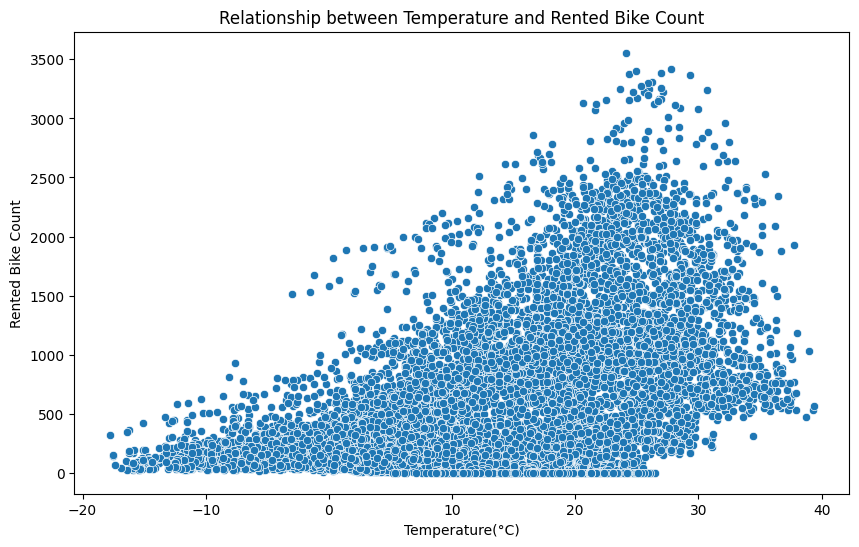

In [41]:
# Visualize the relationship between temperature and rented bike count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=df)
plt.title('Relationship between Temperature and Rented Bike Count')
plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.show()

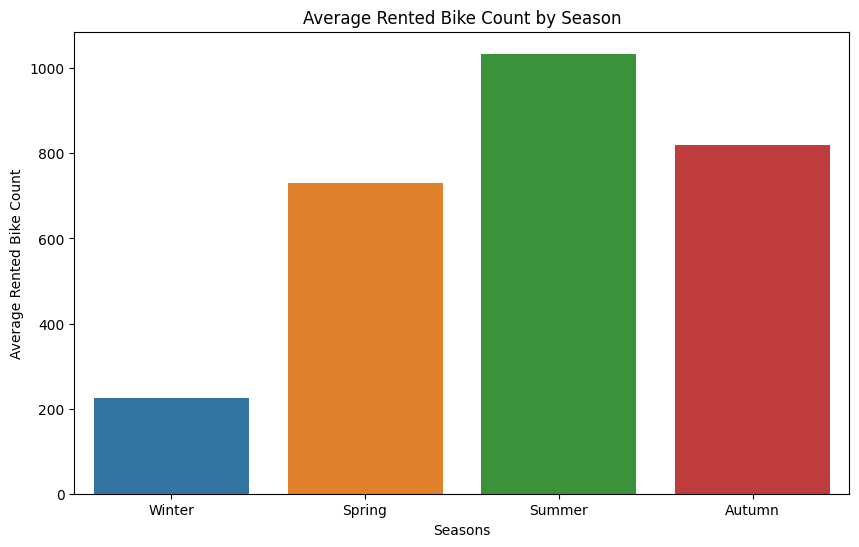

In [42]:
# Visualize the average rented bike count by season
plt.figure(figsize=(10, 6))
sns.barplot(x='Seasons', y='Rented Bike Count', data=df, errorbar=None)
plt.title('Average Rented Bike Count by Season')
plt.xlabel('Seasons')
plt.ylabel('Average Rented Bike Count')
plt.show()

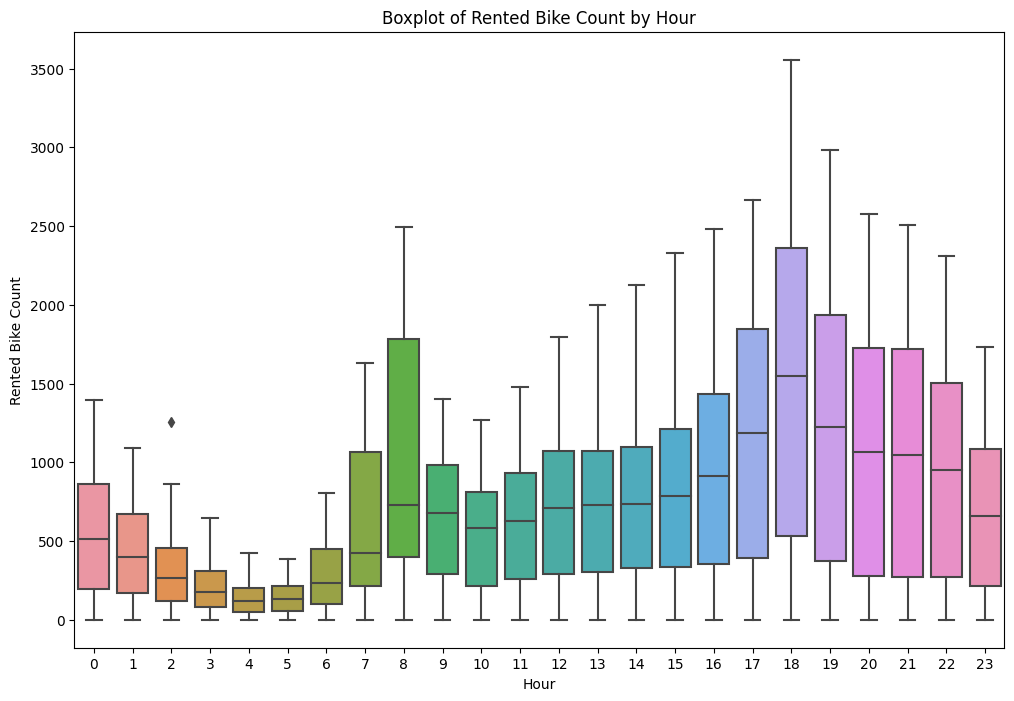

In [43]:
# Visualize the boxplot of rented bike count for each hour
plt.figure(figsize=(12, 8))
sns.boxplot(x='Hour', y='Rented Bike Count', data=df)
plt.title('Boxplot of Rented Bike Count by Hour')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.show()

**Data Pre-processing**

In [44]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes


In [45]:
# Date can be dropped, as all information about a date such as 
# weather, season, holiday and functioning day etc. are already captured 
# by other variables in our data.

df = df.drop(columns=['Date'], axis=1)

**Encoding categorical variables**

In [46]:
df=pd.get_dummies(df, columns=['Seasons', 'Holiday', 'Functioning Day', 'Hour'], drop_first=True)
df

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,0.0,0.0,0.0,False,False,...,False,False,False,False,False,True,False,False,False,False
8756,764,3.4,37,2.3,2000,0.0,0.0,0.0,False,False,...,False,False,False,False,False,False,True,False,False,False
8757,694,2.6,39,0.3,1968,0.0,0.0,0.0,False,False,...,False,False,False,False,False,False,False,True,False,False
8758,712,2.1,41,1.0,1859,0.0,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,True,False


In [47]:
df.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning Day_Yes', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23'],
      dtype='object')

In [48]:
df['Functioning Day_Yes'] = df['Functioning Day_Yes'].astype(int)
df['Holiday_No Holiday'] = df['Holiday_No Holiday'].astype(int)
df['Seasons_Spring'] = df['Seasons_Spring'].astype(int)
df['Seasons_Winter'] = df['Seasons_Winter'].astype(int)
df['Seasons_Summer'] = df['Seasons_Summer'].astype(int)

In [49]:
# Split the data into train test

X = df.drop(['Rented Bike Count'], axis=1)
y = df['Rented Bike Count']

In [50]:
X.shape

(8760, 35)

In [51]:
y.shape

(8760,)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [53]:
X_train

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
8415,13.2,61,3.9,719,1.03,0.0,0.0,0,0,0,...,False,True,False,False,False,False,False,False,False,False
5049,22.9,86,1.7,538,0.76,0.0,0.0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
8395,11.2,46,1.4,869,0.00,0.0,0.0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
1535,-2.6,69,2.0,1434,0.00,0.0,0.0,0,0,1,...,False,False,False,False,False,False,False,False,False,True
5518,27.2,73,1.5,1005,0.00,0.0,0.0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,29.9,74,2.0,1201,0.00,0.0,0.0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
5191,23.5,90,0.5,445,0.05,0.5,0.0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
5390,29.5,62,2.7,1941,1.79,0.0,0.0,0,1,0,...,True,False,False,False,False,False,False,False,False,False
860,-3.4,51,1.1,1391,0.00,0.0,0.0,0,0,1,...,False,False,False,False,False,False,True,False,False,False


# Handling Outliers

In [54]:
train_df = pd.concat([X_train, y_train], axis=1)
train_df

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,...,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Rented Bike Count
8415,13.2,61,3.9,719,1.03,0.0,0.0,0,0,0,...,True,False,False,False,False,False,False,False,False,995
5049,22.9,86,1.7,538,0.76,0.0,0.0,0,1,0,...,False,False,False,False,False,False,False,False,False,1195
8395,11.2,46,1.4,869,0.00,0.0,0.0,0,0,0,...,False,False,False,False,True,False,False,False,False,1448
1535,-2.6,69,2.0,1434,0.00,0.0,0.0,0,0,1,...,False,False,False,False,False,False,False,False,True,178
5518,27.2,73,1.5,1005,0.00,0.0,0.0,0,1,0,...,False,False,False,False,False,False,False,True,False,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,29.9,74,2.0,1201,0.00,0.0,0.0,0,1,0,...,False,False,False,False,False,False,False,True,False,1507
5191,23.5,90,0.5,445,0.05,0.5,0.0,0,1,0,...,False,False,False,False,False,False,False,False,False,828
5390,29.5,62,2.7,1941,1.79,0.0,0.0,0,1,0,...,False,False,False,False,False,False,False,False,False,999
860,-3.4,51,1.1,1391,0.00,0.0,0.0,0,0,1,...,False,False,False,False,False,True,False,False,False,322


In [55]:
columns_to_check = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 
                    'Visibility (10m)', 'Solar Radiation (MJ/m2)', 
                    'Rainfall(mm)', 'Snowfall (cm)']

# Calculate the IQR for each column
Q1 = train_df[columns_to_check].quantile(0.25)
Q3 = train_df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for considering a value as an outlier (e.g., 1.5 times IQR)
threshold = 1.5

# Create a DataFrame of outliers
outliers_df = train_df[((train_df[columns_to_check] < (Q1 - threshold * IQR)) | (train_df[columns_to_check] > (Q3 + threshold * IQR))).any(axis=1)]

# Display the DataFrame containing outliers
print("Outliers:")
outliers_df

Outliers:


,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,...,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Rented Bike Count
3653,18.4,87,0.8,209,0.00,0.4,0.0,1,0,0,...,False,False,False,False,False,False,False,False,False,76
1315,-13.8,32,2.2,2000,0.00,0.0,0.7,0,0,1,...,False,False,False,False,True,False,False,False,False,211
1465,-1.6,81,1.1,1141,0.00,0.0,3.5,0,0,1,...,False,False,False,False,False,False,False,False,False,96
3997,21.8,97,2.4,682,0.06,35.0,0.0,1,0,0,...,False,False,False,False,False,False,False,False,False,151
6399,24.0,94,3.1,1188,0.41,0.5,0.0,0,1,0,...,True,False,False,False,False,False,False,False,False,405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,18.2,93,1.4,572,0.18,1.0,0.0,0,0,0,...,False,False,False,False,False,False,False,False,False,89
1267,-0.1,88,3.2,582,0.00,0.0,1.0,0,0,1,...,False,False,False,False,True,False,False,False,False,167
3005,8.3,81,2.0,1060,0.00,0.1,0.0,1,0,0,...,False,False,False,False,False,False,False,False,False,18
466,-5.4,56,1.1,1751,0.28,0.0,2.0,0,0,1,...,False,False,False,False,False,False,False,False,False,162


In [56]:
import pandas as pd
from scipy.stats.mstats import winsorize

# Create a copy of the original dataset to avoid modifying the original data
train_df_winsorized = train_df.copy()

# Perform winsorizing for each column
for column in columns_to_check:
    lower_bound = Q1[column] - threshold * IQR[column]
    upper_bound = Q3[column] + threshold * IQR[column]
    
    # Winsorize the values for the current column
    train_df_winsorized[column] = winsorize(train_df[column], limits=(0.05, 0.05))

train_df_winsorized

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,...,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Rented Bike Count
8415,13.2,61,3.7,719,1.03,0.0,0.0,0,0,0,...,True,False,False,False,False,False,False,False,False,995
5049,22.9,86,1.7,538,0.76,0.0,0.0,0,1,0,...,False,False,False,False,False,False,False,False,False,1195
8395,11.2,46,1.4,869,0.00,0.0,0.0,0,0,0,...,False,False,False,False,True,False,False,False,False,1448
1535,-2.6,69,2.0,1434,0.00,0.0,0.0,0,0,1,...,False,False,False,False,False,False,False,False,True,178
5518,27.2,73,1.5,1005,0.00,0.0,0.0,0,1,0,...,False,False,False,False,False,False,False,True,False,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,29.9,74,2.0,1201,0.00,0.0,0.0,0,1,0,...,False,False,False,False,False,False,False,True,False,1507
5191,23.5,90,0.5,445,0.05,0.5,0.0,0,1,0,...,False,False,False,False,False,False,False,False,False,828
5390,29.5,62,2.7,1941,1.79,0.0,0.0,0,1,0,...,False,False,False,False,False,False,False,False,False,999
860,-3.4,51,1.1,1391,0.00,0.0,0.0,0,0,1,...,False,False,False,False,False,True,False,False,False,322


In [57]:
train_df[columns_to_check].describe()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000
mean,12.934033,58.199201,1.730765,1436.833904,0.575928,0.143008,0.077212
std,11.890260,20.443491,1.036528,610.387977,0.873781,1.067147,0.451493
min,-17.800000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000
25%,3.500000,42.000000,0.900000,936.750000,0.000000,0.000000,0.000000
50%,13.800000,57.000000,1.500000,1699.000000,0.010000,0.000000,0.000000
75%,22.500000,74.000000,2.400000,2000.000000,0.940000,0.000000,0.000000
max,39.400000,98.000000,7.400000,2000.000000,3.520000,35.000000,8.800000


In [58]:
train_df_winsorized[columns_to_check].describe()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000
mean,12.975899,58.377283,1.709147,1441.003139,0.557834,0.027354,0.010188
std,11.314991,19.689927,0.944980,602.079164,0.825617,0.111636,0.043946
min,-6.900000,27.000000,0.400000,294.000000,0.000000,0.000000,0.000000
25%,3.500000,42.000000,0.900000,936.750000,0.000000,0.000000,0.000000
50%,13.800000,57.000000,1.500000,1699.000000,0.010000,0.000000,0.000000
75%,22.500000,74.000000,2.400000,2000.000000,0.940000,0.000000,0.000000
max,30.700000,94.000000,3.700000,2000.000000,2.570000,0.500000,0.200000


In [59]:
X_train = train_df_winsorized.drop('Rented Bike Count', axis=1)
X_train

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
8415,13.2,61,3.7,719,1.03,0.0,0.0,0,0,0,...,False,True,False,False,False,False,False,False,False,False
5049,22.9,86,1.7,538,0.76,0.0,0.0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
8395,11.2,46,1.4,869,0.00,0.0,0.0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
1535,-2.6,69,2.0,1434,0.00,0.0,0.0,0,0,1,...,False,False,False,False,False,False,False,False,False,True
5518,27.2,73,1.5,1005,0.00,0.0,0.0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,29.9,74,2.0,1201,0.00,0.0,0.0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
5191,23.5,90,0.5,445,0.05,0.5,0.0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
5390,29.5,62,2.7,1941,1.79,0.0,0.0,0,1,0,...,True,False,False,False,False,False,False,False,False,False
860,-3.4,51,1.1,1391,0.00,0.0,0.0,0,0,1,...,False,False,False,False,False,False,True,False,False,False


In [60]:
y_train = train_df_winsorized['Rented Bike Count']
y_train

8415     995
5049    1195
8395    1448
1535     178
5518    1980
        ... 
5734    1507
5191     828
5390     999
860      322
7270    1501
Name: Rented Bike Count, Length: 7008, dtype: int64

# Standard Scaling

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling

In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Define a function to perform k-fold cross-validation, grid search, and print results
def evaluate_model_with_grid_search(model, param_grid, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
    grid_search.fit(X, y)
    
    best_model = grid_search.best_estimator_
    
    mse_scores = -cross_val_score(best_model, X, y, cv=kf, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(mse_scores)
    r2_scores = cross_val_score(best_model, X, y, cv=kf, scoring='r2')
    
    print(f'Model: {type(model).__name__}')
    print(f'Best Parameters: {grid_search.best_params_}')
    print(f'Mean MSE: {np.mean(mse_scores):.4f}')
    print(f'Mean RMSE: {np.mean(rmse_scores):.4f}')
    print(f'Mean R^2: {np.mean(r2_scores):.4f}')
    print('-' * 30)

In [63]:
# Linear Regression
linear_reg = LinearRegression()
evaluate_model_with_grid_search(linear_reg, {}, X_train, y_train)

# Ridge Regression
ridge_reg = Ridge()
ridge_param_grid = {'alpha': [0.1, 1, 10]}
evaluate_model_with_grid_search(ridge_reg, ridge_param_grid, X_train, y_train)

# Lasso Regression
lasso_reg = Lasso()
lasso_param_grid = {'alpha': [0.1, 1, 10]}
evaluate_model_with_grid_search(lasso_reg, lasso_param_grid, X_train, y_train)

# Elastic Net Regression
elastic_net_reg = ElasticNet()
elastic_net_param_grid = {'alpha': [0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]}
evaluate_model_with_grid_search(elastic_net_reg, elastic_net_param_grid, X_train, y_train)

# Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
poly_reg = LinearRegression()
evaluate_model_with_grid_search(poly_reg, {}, X_train_poly, y_train)

Model: LinearRegression
Best Parameters: {}
Mean MSE: 131001.4613
Mean RMSE: 361.9373
Mean R^2: 0.6844
------------------------------
Model: Ridge
Best Parameters: {'alpha': 10}
Mean MSE: 130998.9607
Mean RMSE: 361.9339
Mean R^2: 0.6844
------------------------------
Model: Lasso
Best Parameters: {'alpha': 0.1}
Mean MSE: 131001.7105
Mean RMSE: 361.9377
Mean R^2: 0.6844
------------------------------
Model: ElasticNet
Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.9}
Mean MSE: 131042.5649
Mean RMSE: 361.9946
Mean R^2: 0.6843
------------------------------
Model: LinearRegression
Best Parameters: {}
Mean MSE: 67220.3378
Mean RMSE: 259.2350
Mean R^2: 0.8379
------------------------------


**Non-Linear Machine Learning models:**

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Decision Tree Regression
dt_reg = DecisionTreeRegressor()
dt_param_grid = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
evaluate_model_with_grid_search(dt_reg, dt_param_grid, X_train, y_train)

# Random Forest Regression
rf_reg = RandomForestRegressor()
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
evaluate_model_with_grid_search(rf_reg, rf_param_grid, X_train, y_train)

# Gradient Boosting Regression
gb_reg = GradientBoostingRegressor()
gb_param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
evaluate_model_with_grid_search(gb_reg, gb_param_grid, X_train, y_train)

# k-Nearest Neighbors Regression
knn_reg = KNeighborsRegressor()
knn_param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
evaluate_model_with_grid_search(knn_reg, knn_param_grid, X_train, y_train)

# Support Vector Regression
svm_reg = SVR()
svm_param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'poly']}
evaluate_model_with_grid_search(svm_reg, svm_param_grid, X_train, y_train)

Model: DecisionTreeRegressor
Best Parameters: {'max_depth': 20, 'min_samples_split': 10}
Mean MSE: 90898.4349
Mean RMSE: 301.3713
Mean R^2: 0.7808
------------------------------
Model: RandomForestRegressor
Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Mean MSE: 60229.0704
Mean RMSE: 245.4048
Mean R^2: 0.8542
------------------------------
Model: GradientBoostingRegressor
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Mean MSE: 58975.1989
Mean RMSE: 242.8179
Mean R^2: 0.8584
------------------------------
Model: KNeighborsRegressor
Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Mean MSE: 82306.8601
Mean RMSE: 286.8738
Mean R^2: 0.8016
------------------------------
Model: SVR
Best Parameters: {'C': 1, 'kernel': 'linear'}
Mean MSE: 144757.1766
Mean RMSE: 380.4421
Mean R^2: 0.6516
------------------------------


**Save the model for deployment**

In [65]:
import pickle

# Gradient Boosting Regression
gb_reg = GradientBoostingRegressor()
gb_param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}

# Perform grid search
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(gb_reg, gb_param_grid, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Print information about the best model
print(f'Best Random Forest Model: {best_rf_model}')
print(f'Best Parameters: {grid_search.best_params_}')

# Save the best model to a file using pickle
with open('best_gradient_boosting_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf_model, model_file)

Best Random Forest Model: GradientBoostingRegressor(max_depth=5, n_estimators=200)
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
